In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Transactions.csv to Transactions.csv


In [3]:

transactions = pd.read_csv('Transactions.csv')

transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:

print(transactions.info())

print(transactions.isnull().sum())

print(transactions.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T0

<ipython-input-5-9d43e513e5d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=transactions, palette='viridis')


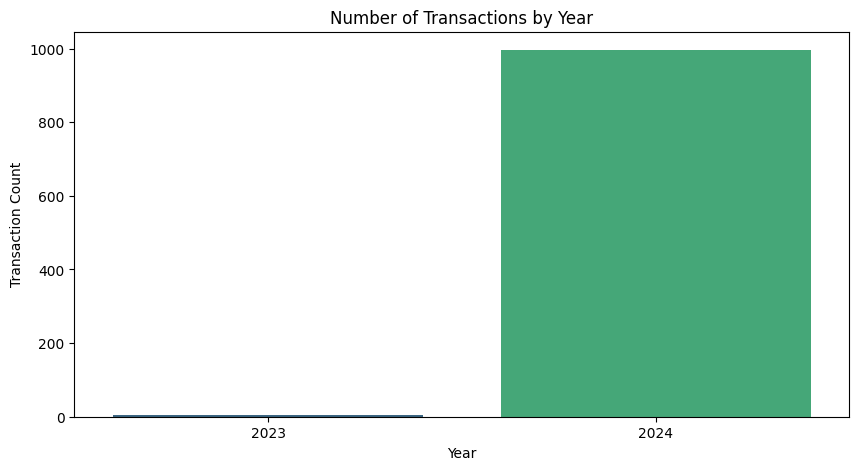

<ipython-input-5-9d43e513e5d8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=transactions, palette='coolwarm')


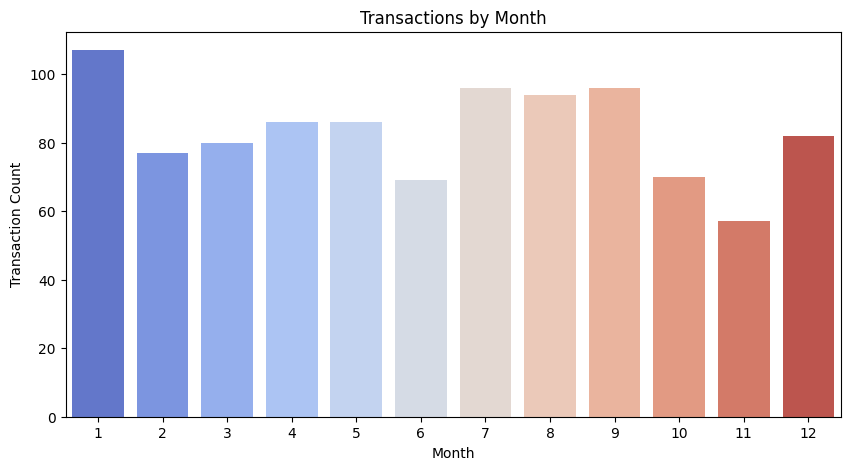

In [5]:

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month

plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=transactions, palette='viridis')
plt.title('Number of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=transactions, palette='coolwarm')
plt.title('Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()


Total Revenue: $689,995.56
Year
2023      3769.52
2024    686226.04
Name: TotalValue, dtype: float64


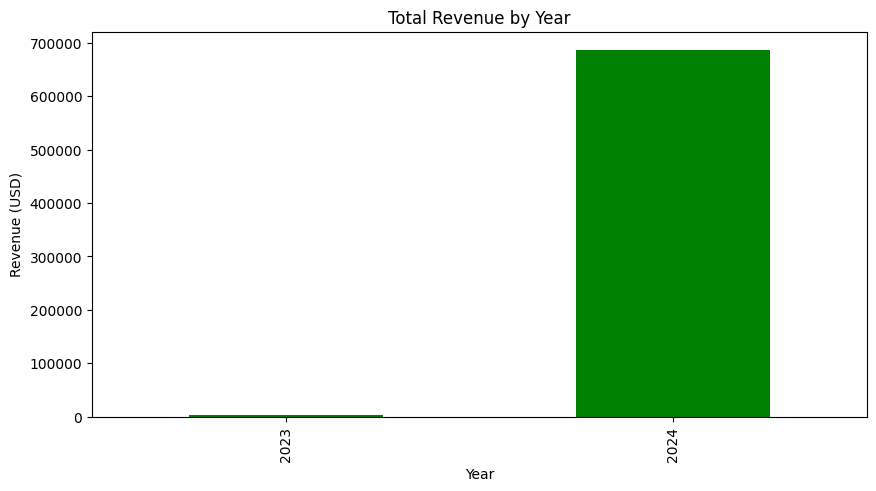

In [6]:

total_revenue = transactions['TotalValue'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

revenue_by_year = transactions.groupby('Year')['TotalValue'].sum()
print(revenue_by_year)

plt.figure(figsize=(10, 5))
revenue_by_year.plot(kind='bar', color='green')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.show()


In [7]:

top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Total Spending:")
print(top_customers)


Top 5 Customers by Total Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [8]:

top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Quantity Sold:")
print(top_products)


Top 5 Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


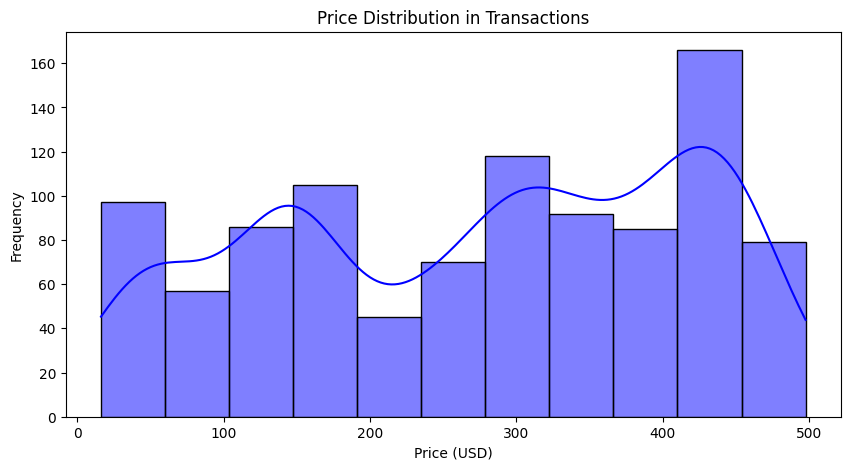

count    1000.00000
mean      272.55407
std       140.73639
min        16.08000
25%       147.95000
50%       299.93000
75%       404.40000
max       497.76000
Name: Price, dtype: float64


In [9]:

plt.figure(figsize=(10, 5))
sns.histplot(transactions['Price'], kde=True, color='blue')
plt.title('Price Distribution in Transactions')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

print(transactions['Price'].describe())


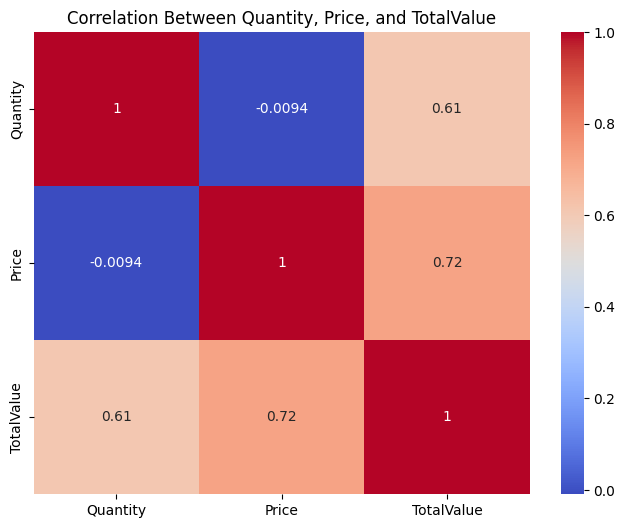

In [10]:

plt.figure(figsize=(8, 6))
sns.heatmap(transactions[['Quantity', 'Price', 'TotalValue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Quantity, Price, and TotalValue')
plt.show()
